# Regression with 1D

In [8]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.reset_defaults()
sns.set_style("whitegrid") #  {darkgrid, whitegrid, dark, white, ticks}
sns.set_context("talk")

Things to do:
* Can also plot beta values? p-values? 

#### Function for loading results

In [23]:
def load_results(results_fn, rep_name):
    results_dir = '../../results/'
    results_path = os.path.join(results_dir,results_fn)
    
    with open(results_path, 'rb') as f:
        data = pickle.load(f)
    
    # Get regression results
    analysis = data['analysis']
    t_x1 = [] # 1D grid
    t_x2 = [] # 2D grid
    t_x3 = [] # congruency (binary)
    for run in analysis:
        print(run[0]['regression_with_1D'][rep_name]['categorical_regression'].keys())
        t_x1.append([s['regression_with_1D'][rep_name]['categorical_regression']['t_statistic'][1] for s in run])
        t_x2.append([s['regression_with_1D'][rep_name]['categorical_regression']['t_statistic'][2] for s in run])
        t_x3.append([s['regression_with_1D'][rep_name]['categorical_regression']['t_statistic'][3] for s in run])
    t_x1 = np.array(t_x1)
    t_x2 = np.array(t_x2)
    t_x3 = np.array(t_x3)
    
    # Get congruent vs. incongruent accuracy results
    results = data['results']
    cong_accs = []
    incong_accs = []
    for run in results:
        cong_accs.append([s['cong_acc'] for s in run['train_accs']])
        incong_accs.append([s['incong_acc'] for s in run['train_accs']])
    cong_accs = np.mean(cong_accs, axis=0)
    incong_accs = np.mean(incong_accs, axis=0)
    acc_ratios = cong_accs/incong_accs
    return t_x1, t_x2, t_x3, acc_ratios

#### Function for plotting results

In [24]:
def plot_regression(t_x1, t_x2, t_x3, acc_ratios, title, save_fn):
    n_checkpoints = len(acc_ratios)
    fig, ax = plt.subplots(3,1, sharex=True, figsize=(20,18))
    
    # 1D grid distances
    sns.boxplot(ax=ax[0], data=t_x1)
    sns.stripplot(ax=ax[0], data=t_x1)
    ax[0].axhline(y=1.96, color='r', linewidth=2)
    ax[0].axhline(y=-1.96, color='r', linewidth=2)
    ax[0].set_title('1D grid distances ("Compression")')
    ax[0].set_ylabel("T statistic")
    
    # 2D grid distances
    sns.boxplot(ax=ax[1], data=t_x2)
    sns.stripplot(ax=ax[1], data=t_x2)
    ax[1].axhline(y=1.96, color='r', linewidth=2)
    ax[1].axhline(y=-1.96, color='r', linewidth=2)
    ax[1].set_ylabel("T statistic")
    ax[1].set_title('2D grid distances ("Map")')
    
    # Congruency
    sns.boxplot(ax=ax[2], data=t_x3)
    sns.stripplot(ax=ax[2], data=t_x3)
    ax[2].axhline(y=1.96, color='r', linewidth=2)
    ax[2].axhline(y=-1.96, color='r', linewidth=2)
    ax[2].set_ylabel("T statistic")
    ax[2].set_title('Congruency ("warping")')
    ax[2].set_xticklabels([i*analyze_every for i in range(n_checkpoints)])
    ax[2].set_xlabel("Steps")
    
    # Accuracy ratio
#     ax2 = ax.twinx()
#     ax2 = sns.lineplot(data=acc_ratios, err_style="bars", markers=True, dashes=False, palette=['darkblue'])
#     ax.set_title("Warping vs. accuracy")
#     ax2.legend(["Accuracy Ratio"])
#     ax2.set_ylim([-1, 3])
#     ax2.set_ylabel("Ratio (congruent / incongruent)")

    # Save
    if save_fn is not None:
        plt.savefig(save_fn, dpi=300, bbox_inches='tight')
    
    plt.show()

## MLP

In [25]:
results_fn = 'mlp.P'
rep_name = 'hidden'
analyze_every = 50
title = "MLP"
save_fn = '../../figures/mlp_regression_with_1D.png'

dict_keys(['p_value', 't_statistic', 'betas', 'bse'])
dict_keys(['p_value', 't_statistic', 'betas', 'bse'])
dict_keys(['p_value', 't_statistic', 'betas', 'bse'])
dict_keys(['p_value', 't_statistic', 'betas', 'bse'])
dict_keys(['p_value', 't_statistic', 'betas', 'bse'])
dict_keys(['p_value', 't_statistic', 'betas', 'bse'])
dict_keys(['p_value', 't_statistic', 'betas', 'bse'])
dict_keys(['p_value', 't_statistic', 'betas', 'bse'])
dict_keys(['p_value', 't_statistic', 'betas', 'bse'])
dict_keys(['p_value', 't_statistic', 'betas', 'bse'])
dict_keys(['p_value', 't_statistic', 'betas', 'bse'])
dict_keys(['p_value', 't_statistic', 'betas', 'bse'])
dict_keys(['p_value', 't_statistic', 'betas', 'bse'])
dict_keys(['p_value', 't_statistic', 'betas', 'bse'])
dict_keys(['p_value', 't_statistic', 'betas', 'bse'])
dict_keys(['p_value', 't_statistic', 'betas', 'bse'])
dict_keys(['p_value', 't_statistic', 'betas', 'bse'])
dict_keys(['p_value', 't_statistic', 'betas', 'bse'])
dict_keys(['p_value', 't_sta

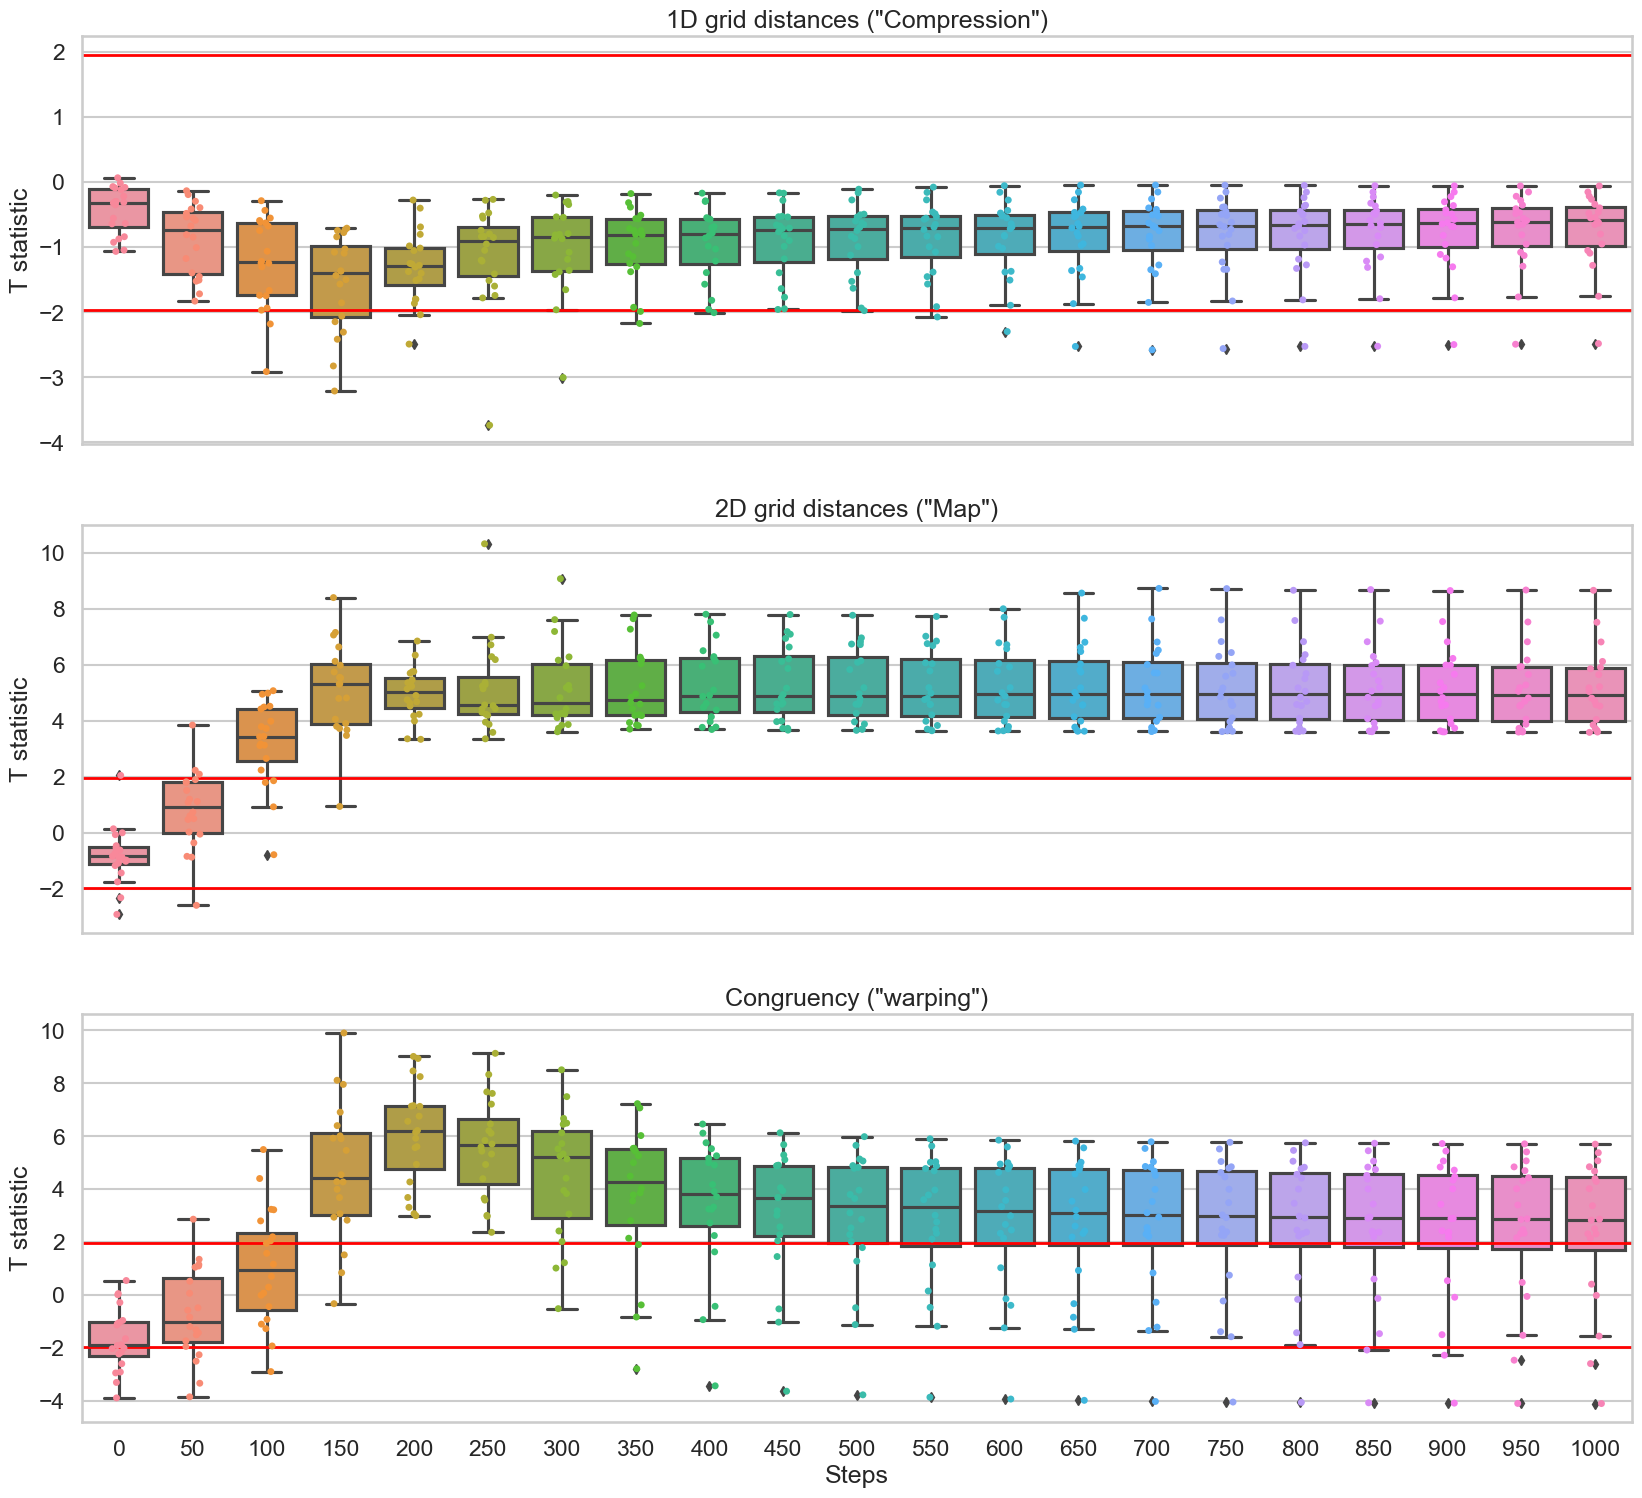

In [26]:
t_x1, t_x2, t_x3, acc_ratios = load_results(results_fn, rep_name)
plot_regression(t_x1, t_x2, t_x3, acc_ratios, title, save_fn)

## RNN

In [21]:
results_fn = 'rnn.P'
rep_name = 'average'
analyze_every = 50
title = "RNN"
save_fn = '../../figures/rnn_regression_with_1D.eps'

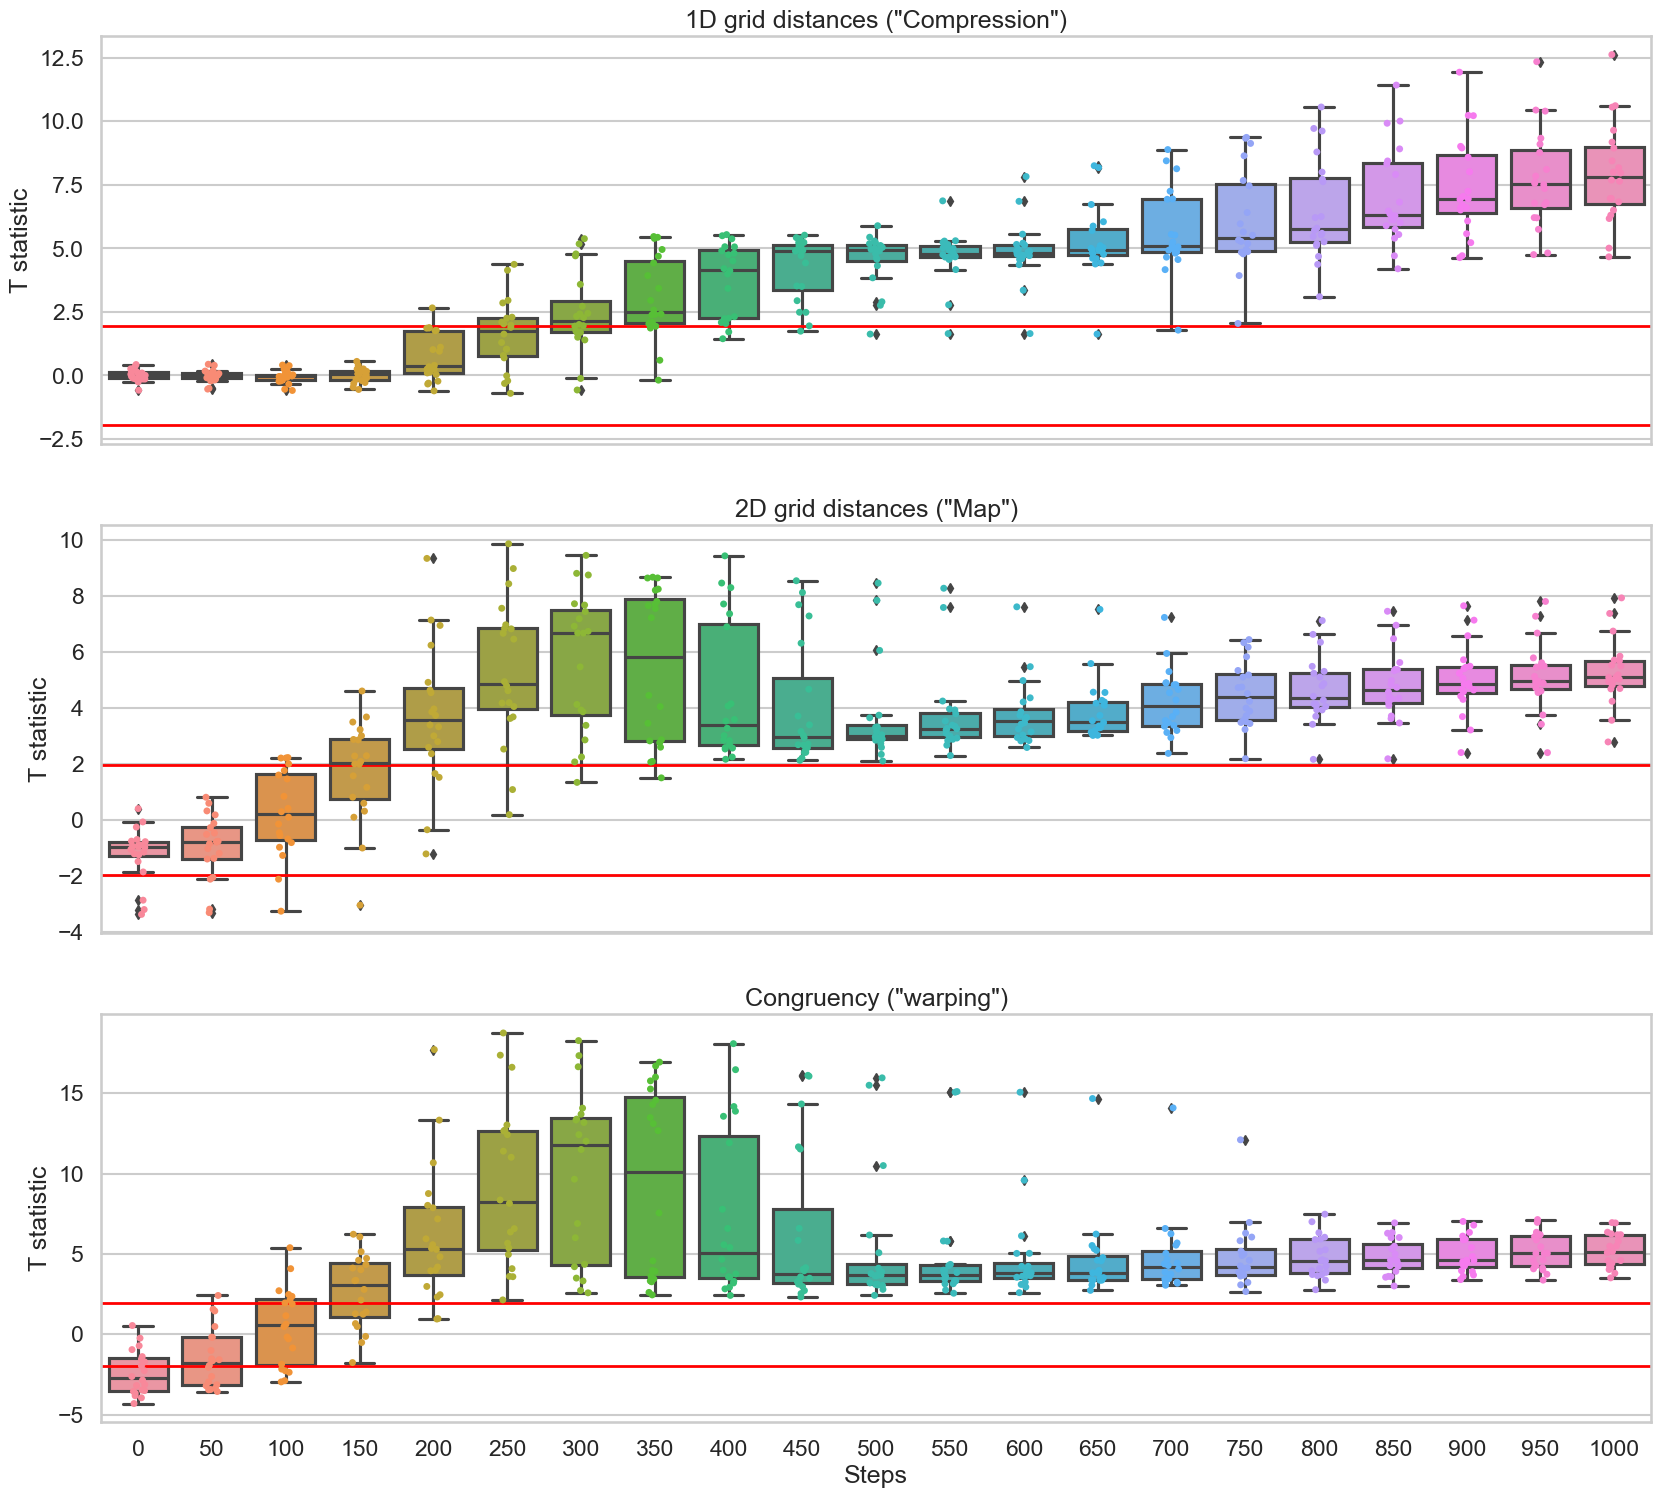

In [22]:
t_x1, t_x2, t_x3, acc_ratios = load_results(results_fn, rep_name)
plot_regression(t_x1, t_x2, t_x3, acc_ratios, title, save_fn)